In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data_path = 'data/fao_stat/CommodityBalances_Crops_E_All_Data_(Normalized).csv'
commodity_crops = pd.read_csv(data_path,encoding='ISO-8859-1')

In [8]:
commodity_crops_ch = commodity_crops[commodity_crops['Area']=='Switzerland']
commodity_crops_ch

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
4351954,211,Switzerland,2666,Abaca,5610,Import Quantity,1961,1961,tonnes,0.0,S
4351955,211,Switzerland,2666,Abaca,5610,Import Quantity,1962,1962,tonnes,0.0,S
4351956,211,Switzerland,2666,Abaca,5610,Import Quantity,1963,1963,tonnes,0.0,S
4351957,211,Switzerland,2666,Abaca,5610,Import Quantity,1964,1964,tonnes,0.0,S
4351958,211,Switzerland,2666,Abaca,5610,Import Quantity,1965,1965,tonnes,0.0,S
...,...,...,...,...,...,...,...,...,...,...,...
4387353,211,Switzerland,2918,Vegetables,5153,Other uses,2009,2009,tonnes,370.0,A
4387354,211,Switzerland,2918,Vegetables,5153,Other uses,2010,2010,tonnes,82.0,A
4387355,211,Switzerland,2918,Vegetables,5153,Other uses,2011,2011,tonnes,340.0,A
4387356,211,Switzerland,2918,Vegetables,5153,Other uses,2012,2012,tonnes,0.0,A


In [6]:
data_save_path = 'data/fao_stat/pickle_files/CommodityBalances_Crops_E_All_Data_(Normalized)_Switzerland.pkl'

In [12]:
# Save the subset of the data to a pickle file 
commodity_crops_ch.to_pickle(data_save_path)

In [32]:
# read data from the pickle file
commodity = pd.read_pickle(data_save_path)

In [8]:
# Check how many distinct units we have for the data
commodity['Unit'].value_counts()

tonnes    35404
Name: Unit, dtype: int64

We only have tonnes as a unit for the quantity, which makes things easier for analysis

In [9]:
commodity.groupby('Element')['Value'].sum()

Element
Domestic supply quantity         827212387.0
Export Quantity                   46948772.0
Feed                             181414823.0
Food supply quantity (tonnes)    443741360.0
Import Quantity                  371590442.0
Losses                            19214114.0
Other uses                        31705723.0
Processing                       151180145.0
Production                       500839139.0
Seed                               9773332.0
Stock Variation                    1731551.0
Name: Value, dtype: float64

In [10]:
imports_ch = commodity[commodity['Element'] =='Import Quantity']
exports_ch = commodity[commodity['Element'] =='Export Quantity']
supply_ch = commodity[commodity['Element'] == 'Domestic supply quantity']

Text(0, 0.5, 'Tonnes')

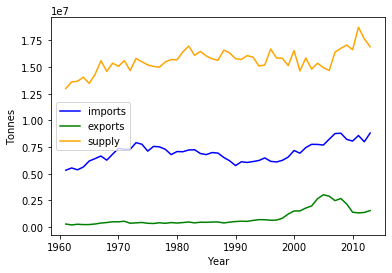

In [11]:
imports_ch_evolution = imports_ch.groupby('Year').sum().drop(['Area Code', 'Item Code', 'Element Code', 'Year Code'],axis=1) 
exports_ch_evolution = exports_ch.groupby('Year').sum().drop(['Area Code', 'Item Code', 'Element Code', 'Year Code'],axis=1) 
supply_ch_evolution = supply_ch.groupby('Year').sum().drop(['Area Code', 'Item Code', 'Element Code', 'Year Code'],axis=1) 
fig, ax = plt.subplots()

ax.plot(imports_ch_evolution,color='b',label = 'imports')
ax.plot(exports_ch_evolution,color='g', label = 'exports')
ax.plot(supply_ch_evolution,color='orange', label = 'supply')
ax.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Tonnes')

In [29]:
imports_ch.groupby('Item')['Value'].sum().sort_values(ascending=False).head(20)

Item
Cereals - Excluding Beer    58919929.0
Fruits - Excluding Wine     28413041.0
Wheat and products          21896704.0
Vegetables                  18719783.0
Barley and products         17497614.0
Alcoholic Beverages         14612207.0
Sugar & Sweeteners          13557524.0
Sugar, Raw Equivalent       13557524.0
Vegetables, Other           11905546.0
Sugar (Raw Equivalent)      10841452.0
Wine                        10292108.0
Sugar, Refined Equiv         9974135.0
Maize and products           9029922.0
Oranges, Mandarines          8492242.0
Fruits, Other                8379394.0
Starchy Roots                7957309.0
Potatoes and products        7506672.0
Oilcrops                     6974967.0
Tomatoes and products        6478151.0
Stimulants                   5896337.0
Name: Value, dtype: float64

In [30]:
exports_ch.groupby('Item')['Value'].sum().sort_values(ascending=False).head(20)

Item
Fruits - Excluding Wine     9350945.0
Oranges, Mandarines         5527674.0
Stimulants                  3572731.0
Apples and products         2656691.0
Sugar & Sweeteners          2104437.0
Sugar, Raw Equivalent       2104437.0
Cereals - Excluding Beer    1814014.0
Wheat and products          1667228.0
Coffee and products         1653465.0
Sweeteners, Other           1376834.0
Starchy Roots               1334474.0
Potatoes and products       1332594.0
Cocoa Beans and products    1303482.0
Tobacco                     1276667.0
Vegetables                  1180150.0
Vegetables, Other            977177.0
Fruits, Other                946607.0
Vegetable Oils               812524.0
Sugar (Raw Equivalent)       727604.0
Sugar, Refined Equiv         669396.0
Name: Value, dtype: float64

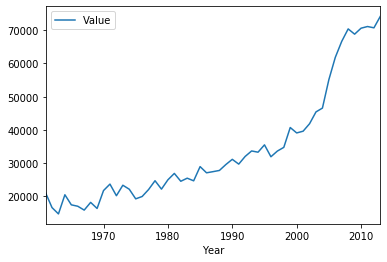

In [66]:
cocoa_beans_code = 2633

cocoa_data = commodity[commodity['Item Code'] == cocoa_beans_code]
imports_cocoa = cocoa_data[cocoa_data['Element']=='Import Quantity']
imports_cocoa[['Value','Year']].plot('Year','Value')
